In [373]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize_scalar

In [374]:
# create a likelihood function for a normal distribution with known variance
def likelihood(x, mu):
    '''
    Likelihood function for a normal distribution with known variance
    Inputs: 
    x : array-like, observed data
    mu : float, mean of the normal distribution
    Outputs:
    likelihood : float, product of the probabilities of observing the data given mu
    '''
    return np.prod(norm.pdf(x, loc=mu, scale=1))

# create a log-likelihood function for a normal distribution with known variance
def log_likelihood(x, mu):
    '''
    Log-likelihood function for a normal distribution with known variance
    Inputs: 
    x : array-like, observed data
    mu : float, mean of the normal distribution
    Outputs:
    log_likelihood : float, sum of the log probabilities of observing the data given mu
    '''
    return np.sum(norm.logpdf(x, loc=mu, scale=1))  # use logpdf for numerical stability


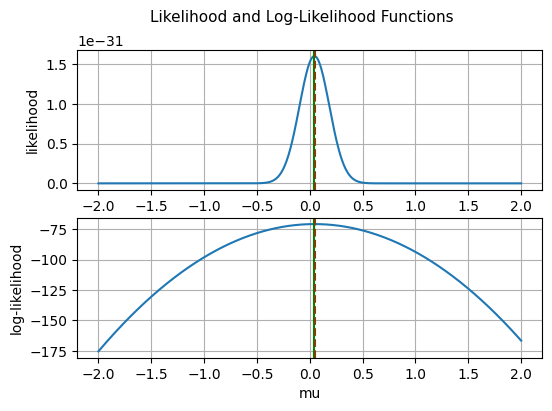

In [375]:
# generate n samples from a Gaussian distribution
# Set parameters
mu = 0      # mean
sigma = 1   # standard deviation
n = 50    # number of samples

# Generate samples
x = norm.rvs(loc=mu, scale=sigma, size=n)

mu_values = np.linspace(-2, 2, 1000)

# calculate the likelihood for each mu value
likelihood_values = [likelihood(x, mu) for mu in mu_values]
log_likelihood_values = [log_likelihood(x, mu) for mu in mu_values]

# plot the likelihood function and log-likelihood function in a 1x2 subplot

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6, 4))

ax[0].plot(mu_values, likelihood_values)
# add super title
fig.suptitle('Likelihood and Log-Likelihood Functions', fontsize=11)

ax[0].set_xlabel('mu')
ax[0].set_ylabel('likelihood')
ax[0].grid()
# add verticle line at the maximum of the likelihood function
max_likelihood_mu = mu_values[np.argmax(likelihood_values)]
ax[0].axvline(x=max_likelihood_mu, color='r', linestyle='--')
# add verticle line at the mean of the samples
ax[0].axvline(x=np.mean(x), color='g', linestyle='-')

ax[1].plot(mu_values, log_likelihood_values)
ax[1].set_xlabel('mu')
ax[1].set_ylabel('log-likelihood')
ax[1].grid()
# add verticle line at the maximum of the log-likelihood function
max_log_likelihood_mu = mu_values[np.argmax(log_likelihood_values)]
ax[1].axvline(x=max_log_likelihood_mu, color='r', linestyle='--')
# add verticle line at the mean of the samples
ax[1].axvline(x=np.mean(x), color='g', linestyle='-')
plt.show()


In [376]:
# compute the maximum of likeluhood(x, mu) by algorithm

L = lambda mu: -likelihood(x, mu)  # we minimize the negative likelihood
res = minimize_scalar(L, bounds=(-2, 2), method='bounded')
max_likelihood_mu = res.x
max_likelihood = likelihood(x, max_likelihood_mu)
print(f"Maximum likelihood mu: {max_likelihood_mu}")
print(f"Maximum likelihood: {max_likelihood}")

Maximum likelihood mu: 0.04404523332139049
Maximum likelihood: 1.6022826067257018e-31


In [377]:
print(x.mean())

0.04404581326744695


In [378]:
# create a likelihood function for a normal distribution with unknown mean and variance
def likelihood_two(x, mu, sigma):
    return np.prod(norm.pdf(x, loc=mu, scale=sigma))

# create a log-likelihood function for a normal distribution with unknown mean and variance
def log_likelihood_two(x, mu, sigma):
    return np.sum(norm.logpdf(x, loc=mu, scale=sigma))  # use logpdf for numerical stability


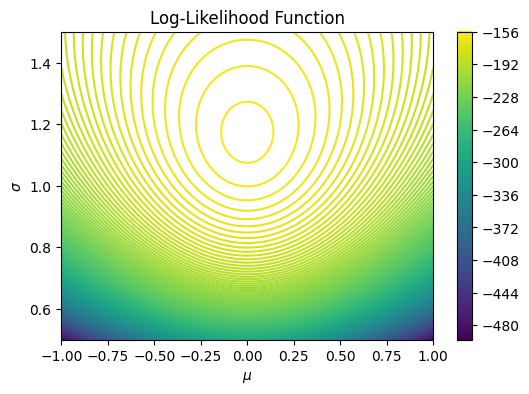

In [ ]:
# draw the log-likelihood function as a contour plot
mu_values = np.linspace(-1, 1, 100)
sigma_values = np.linspace(0.5, 1.5, 100)
MU, SIGMA = np.meshgrid(mu_values, sigma_values)
# Z = log_likelihood_two(x, MU, SIGMA)
# Z = np.array([[log_likelihood_two(x, mu, sigma) for mu in mu_values] for sigma in sigma_values])
Z = np.zeros(MU.shape)
for i in range(len(sigma_values)):
    for j in range(len(mu_values)):
        Z[i, j] = log_likelihood_two(x, mu_values[j], sigma_values[i])
fig, ax = plt.subplots(figsize=(6, 4))
contour = ax.contour(MU, SIGMA, Z, levels=200, cmap='viridis')
fig.colorbar(contour)
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.set_title('Log-Likelihood Function')
plt.show()

In [393]:
# use algorithm to compute the maximum likelihood estimates of mu and sigma
from scipy.optimize import minimize

L = lambda params: -log_likelihood_two(x, *params)  # we minimize the negative log-likelihood
res = minimize(L, x0=[1, 1.5], bounds=[(-2, 2), (0.01, 2)])
max_likelihood_mu = res.x[0]
max_likelihood_sigma = res.x[1]
max_likelihood = res.fun
log_max_likelihood = log_likelihood_two(x, max_likelihood_mu, max_likelihood_sigma)
print(f"Maximum likelihood mu: {max_likelihood_mu}")
print(f"Maximum likelihood sigma: {max_likelihood_sigma}")
print(f"Maximum log-likelihood: {log_max_likelihood}")


Maximum likelihood mu: -3.9646389280363715e-07
Maximum likelihood sigma: 1.166305756589624
Maximum log-likelihood: -157.27799027839635


In [381]:
print(res)

      fun: 70.90867939888065
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.26325641e-06, 0.00000000e+00])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 27
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([0.04404584, 0.99923535])


In [382]:
print(L([res.x[0], res.x[1]]), -L([0, 1]))

70.90867939888065 -70.9572094826861


In [383]:
print(-L([0,1]), -L([0.02,0.9]), -L([x.mean(), x.std()]))
print(x.mean(), x.std())

-70.9572094826861 -71.51376138250902 -70.90867939888064
0.04404581326744695 0.9992353472689544


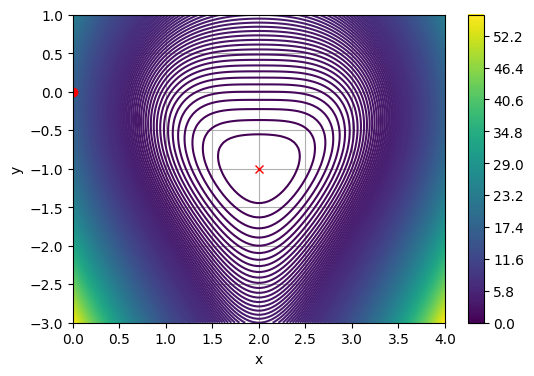

      fun: 5.068540658547753e-13
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 8.06989604e-07, -1.16992599e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 27
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([ 2.0000004 , -1.00000059])


In [384]:
f = lambda x : (x[0]-2)**4 + (x[0]-2)**2 * x[1]**2 + (x[1]+1)**2

x = np.linspace(0, 4, 100)
y = np.linspace(-3, 1, 100)
X, Y = np.meshgrid(x, y) # mesh grid matric
Z = f([X, Y])

fig, ax = plt.subplots(figsize=(6, 4))
contour = ax.contour(X, Y, Z, levels=300)
# add grid
ax.grid()
fig.colorbar(contour)
# mark the point (0,0)
ax.plot(0, 0, 'ro')
# mark the point (2,-1)
ax.plot(2, -1, 'rx')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# find the minimum of f using scipy.optimize.minimize
res = minimize(f, x0=[0, 0], bounds=[(0, 4), (-3, 1)])
print(res)

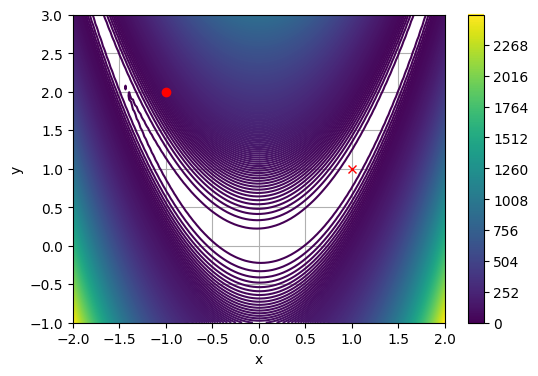

      fun: 5.814733797217326e-12
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 8.38841849e-06, -3.58966127e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 156
      nit: 37
     njev: 52
   status: 0
  success: True
        x: array([0.9999976 , 0.99999518])


In [385]:
f = lambda x : 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2  # Rosenbrock function

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y) # mesh grid matric
Z = f([X, Y])

fig, ax = plt.subplots(figsize=(6, 4))
contour = ax.contour(X, Y, Z, levels=500)
# add grid
ax.grid()
fig.colorbar(contour)
# mark the point (1,1)
ax.plot(1, 1, 'rx')
# mark the point (-1,2)
ax.plot(-1, 2, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
res = minimize(f, x0=[-1, 2], bounds=[(-2, 2), (-1, 3)])
print(res)